<a href="https://colab.research.google.com/github/AndrewCrossman/DSPS_ACrossman/blob/main/DSPS2021exam_Crossman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSPS2021 exam


This is an exercise in **classification** based on **feature engineering**. In the _first part_  (feature engineering) of the exercise you will acquire and process the data, using statistical tools and knowledge from the first half of the semester. This will lead to a set of features that characterize each object which you will use in _the second part_ (classification) to choose and build a model that performs classification tasks and evaluate its results.



Complete this exercise and turn it in to me **by emailing me the google colab link** within 72 hours. Then I will see you at your "interview" which is the oral portion of the exam. In the oral session you will duscuss and explain your choices.

**What I expect in the written exam:**
I expect that you will perform the following tasks after having acquired the data:
- data exploration
- preprocessing including scaling as apprioriate for the model you chose
- model development and fitting
- evaluation of your model performance


I expect figures with captions and axis labels (please dont forget axis labels and captions! its the easiest way to make me mad!) wherever apprioriate to understand the data/results. 

I expect that you will discuss each step and to what extent it was successful, to what extent it can be improved. 

I expect a justification for all your choices (e.g. how you deal with missing values) includind a description of the shortcomings of your choice

I expect your code to be reproducible and to run: reproducible means that when I run it I should get the exact same numbers. Where random numbers are used you should _seed_ your random sequence (by setting a seed or the random_state if available in the model). Running means that your code should, well... run. Meaning when I click Runtime RunAll the code should not stop until the last cell. Make sure you rerun your code from the beginning to assure it works before you deliver it!   

Put your "narrative" in text cells. Present the code neatly, deleting cells of code used for testing but leaving in all cells needed for the code to work.

461 students: graded out of 15 points (17 available + EC)
661 students: graded out of 20 points (21 available + EC_)

OVERVIEW

PART I: Data preparation:

1. Data Acquisition  <font color='blue'>
3 points </font>
2. Data exploration and visualization  <font color='blue'> 3 points</font>
3. Extract features <font color='blue'> 5 points</font>
- Task III.1 describe each feature you plan to extract.
- Task III.2 extract some features from the raw lightcurve 
- Task III.3 standardize the lcvs and extract some features from the raw lightcurve 
- Task III.4: extract some features from the metadata 
- Task III.5: assemble and show your feature space

PART II: Classifying:

4. Task IV: Create your train and test set out of the feature matrix and preprocess them with the appropriately (remember that based on the model you choose you may need to scale, normalize, standardize, or whiten your data) <font color='blue'> 2 points</font>

5. Easy classification task <font color='blue'>4 points</font>
- Task V.I Build a model and fit it to the data (2 pts)
- Task V.II Measure model accuracy and comment <font color='blue'> 1 points</font>
- Task V.III Visualize the model results <font color='blue'> 1 points</font>

6. Harder classification task - mandatory for 661 EC for 461 <font color='blue'>4 points</font> 
- Task VI.I Build a model, (ideally use a different one or try the same one you used before _and_ a different one to compare, can be 2 models from the same family tho, like two different ensamble methods) and fit it to the data (2 pts) 
- Task VI.II Measure model accuracy and comment <font color='blue'> 1 points</font>
- Task VI.III Visualize the model results <font color='blue'> 1 points</font>

EC: try to visualize the features. This is a high dimensional parameter space. you can for example try 2D t-SNE projection of your feature space and visualize it. <font color='blue'>2 points</font>





<font color='red'>IMPORTANT: if you get stuck in part 1, for example in taks 3, you can download _my_ features dataset and move on to the classification task. You will not get points for the feature extraction tasks you did not perform but you will still get points for modeling</font>

## OVERVIEW

The PLAsTiCC challend is a Kaggle challange to classify astrophysical objects (e.g. stars, exploding stars, stars with planets transiting, black holes) based on their time variability in light emission in 6 different bands (i.e. wavelength ranges). The sampling (the cadence of the observations) is designed to show what the upcming Rubin Observatory LSST (Legacy Survey of Space and Time) will see when it starts observing (in 2024). 

You can refer to this notebook https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit (written by my good friend Gautham Narayan) to get started and ingest and preprocess the PLASTiCC challenge data. If you are not familiar with python classes (object oriented syntax) do not worry about it: I do want you to extract the features yourself. So use it as a guideline, but do not just copy and paste.

Your task is to extract features, i.e. representations of the time series, and run 2 classifiers on these models: one to identify which survey the data comes from, one to identify which kind of object it is. 



In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
import json
import os
import sklearn as sk
from google.colab import drive
from pprint import pprint
from scipy.stats import linregress
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.manifold import TSNE
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# TASK I :  Data Acquisition 3 points
 For full points use the kaggle API to get the data. You can download the data from kaggle
 --- https://www.kaggle.com/c/PLAsTiCC-2018
 If that does not work you can get the data from Zenodo but make sure that it is a reproducible way (the downloading has to happen inside the notebook).
 --- https://zenodo.org/record/2539456#.XonrIdNKjOQ
You will need the **training data and the metadata files** only - you wont need to use the test data


In [ ]:
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/

In [ ]:
cd PLAsTiCC-2018/

In [ ]:
lcvs = pd.read_csv("training_set.csv")

In [ ]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


read the Kaggle challenge for a description of the data . This "Starter Kit" which includes a notebook (written by y good friend Gautham Narayan) may be especially useful
https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit

For each object there are 6 time series in 6 different passbands (see overview.) 

In [ ]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [ ]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [ ]:
metadata = pd.read_csv("training_set_metadata.csv")
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [ ]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [ ]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


make sure you print statements like the ones above summarizing the size of the datasets you acquire and you show the beginning of each dataset



# TASK II : data exploration and visualization - plot some time series - 3 points
### 1) You always need to visualize your data to get a sense of what we are working with. The challenge is that here you have 6 photometric bands (6 filters that cover different wavelength ranges) for each object. (2 points)

**Include object 84716**

### 2) Visualize the distribution of each of the feature of the metadata (1 point)

[  615   713   730   745  1124  1227  1598  1632  1920  1926 84716]


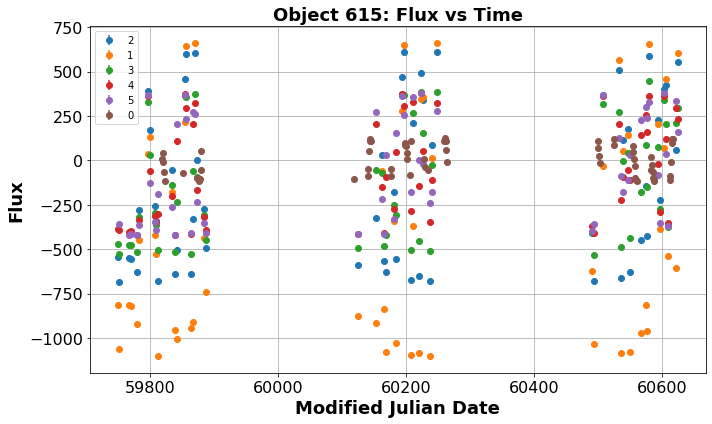

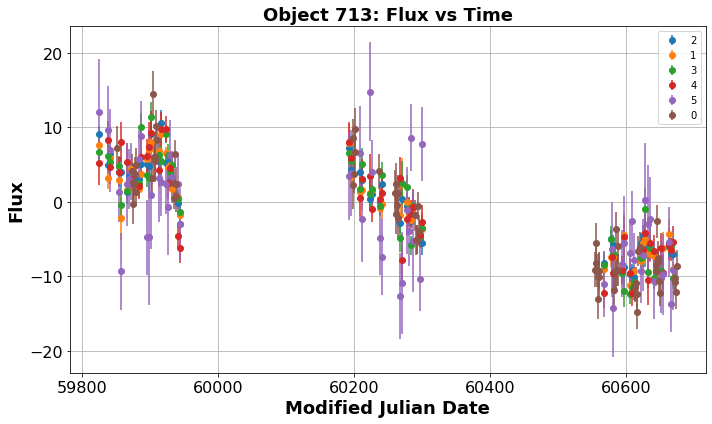

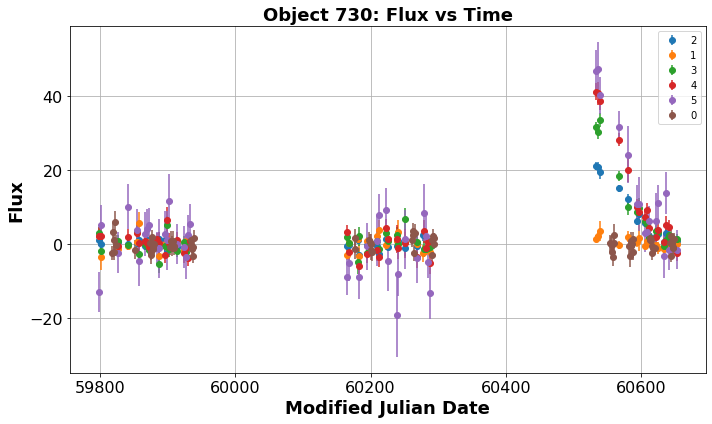

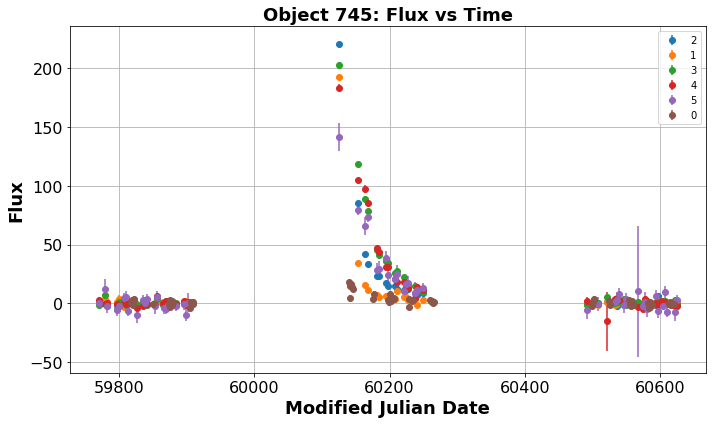

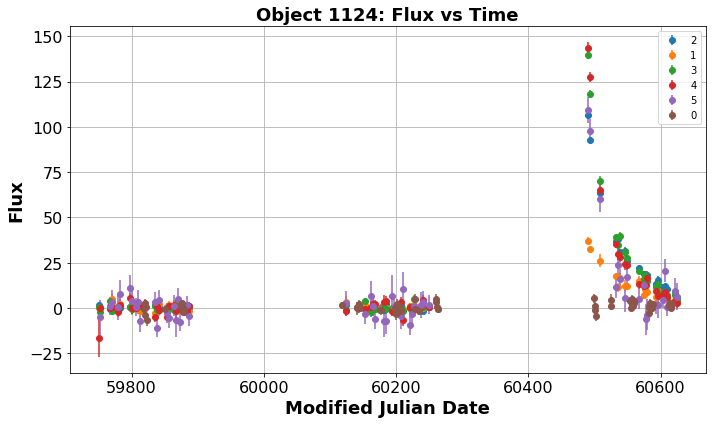

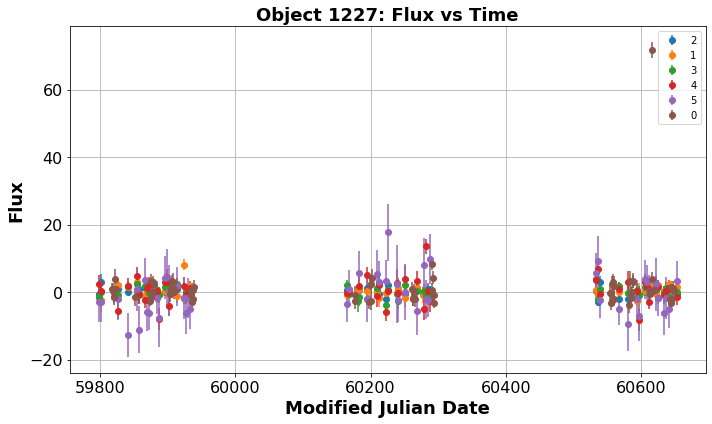

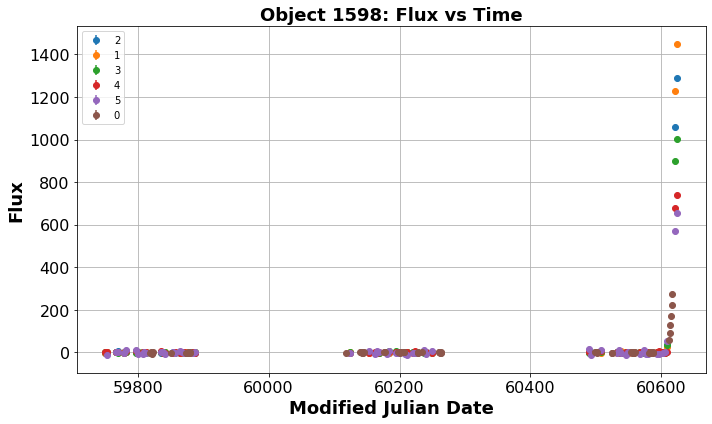

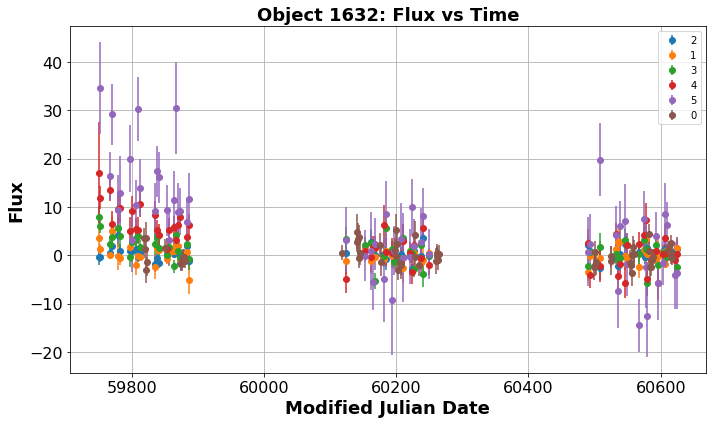

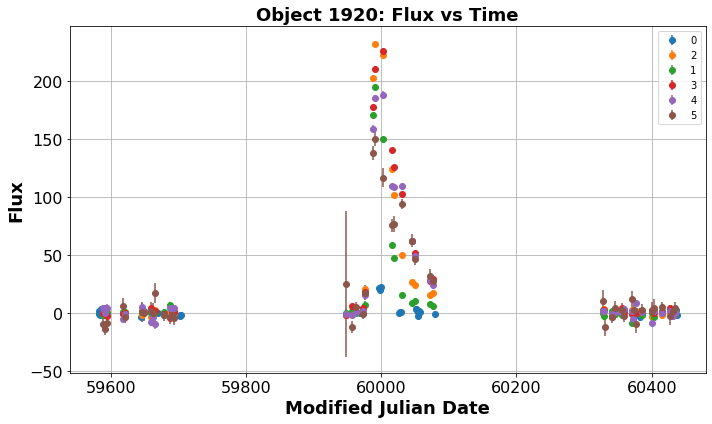

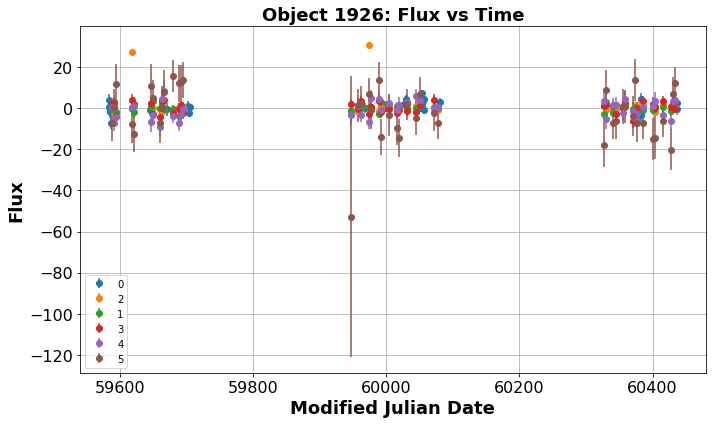

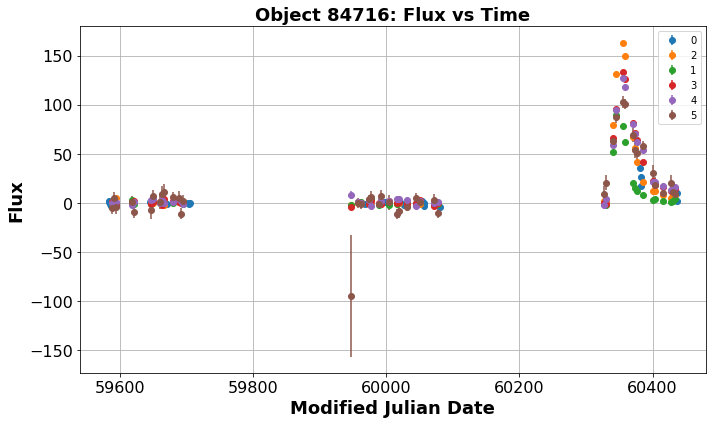

In [ ]:
objects_to_plot = objects[:10]
objects_to_plot = np.append(objects_to_plot, 84716)
print(objects_to_plot)

for x in objects_to_plot:
  plt.figure(figsize=(10,6))
  data = (lcvs[lcvs['object_id'] == x])
  for y in data["passband"].unique():
    data2 = (data[data["passband"] == y])
    flux = data2['flux']
    ferr = data2["flux_err"]
    date = data2["mjd"]
    plt.errorbar(date, flux, yerr=ferr, fmt="o", label=y)
  plt.title("Object "+str(x)+": Flux vs Time", fontsize=18, fontweight='bold')
  plt.xlabel("Modified Julian Date", fontsize=18, fontweight='bold')
  plt.ylabel("Flux", fontsize=18, fontweight='bold')
  plt.legend()
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

#**Figure One**:

*The above plots show how the six different band filters change with respect to time for ten different objects. Inspection of the plots reveals several important aspects: (1) object to object the intensities of the flux vary dramatically, (2) with several exceptions, the error in the flux tends to be very small relative to the measured flux, (3) the data is separated into three different clusters for each object, indicating that there are exist large time gaps between measurements.*

In [ ]:
metadata.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


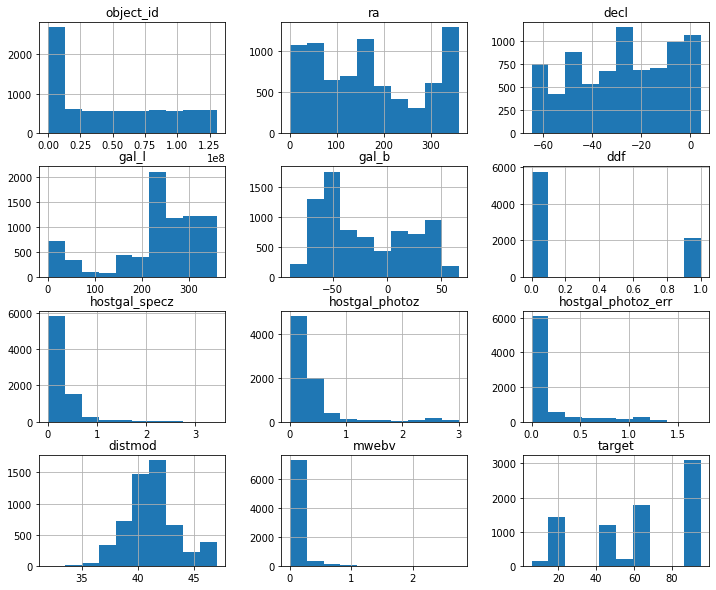

In [ ]:
metadata.hist(figsize=(12,10), grid=True);

metadata2 = metadata.drop(columns=["object_id","ddf"])
print("Here I drop the 'irrelevant' columns from metadata to make a scatter \n"+
      "matrix to look for relationships. I chose to drop object_id because \n"+
      "it is just a name and is not a physical measurement. For the same \n"+
      "reason I dropped ddf because it just refers to a survey area from \n"+
      "which the object was taken.")

In [ ]:
metadata2 = metadata.drop(columns=["object_id","ddf"]) 
print("Here I drop the 'irrelevant' columns from metadata to make a scatter \n"+
    "matrix to look for relationships. I chose to drop object_id because \n"+
    "it is just a name and is not a physical measurement. For the same \n"+
    "reason I dropped ddf because it just refers to a survey area from \n"+
    "which the object was taken.")

Here I drop the 'irrelevant' columns from metadata to make a scatter 
matrix to look for relationships. I chose to drop object_id because 
it is just a name and is not a physical measurement. For the same 
reason I dropped ddf because it just refers to a survey area from 
which the object was taken.


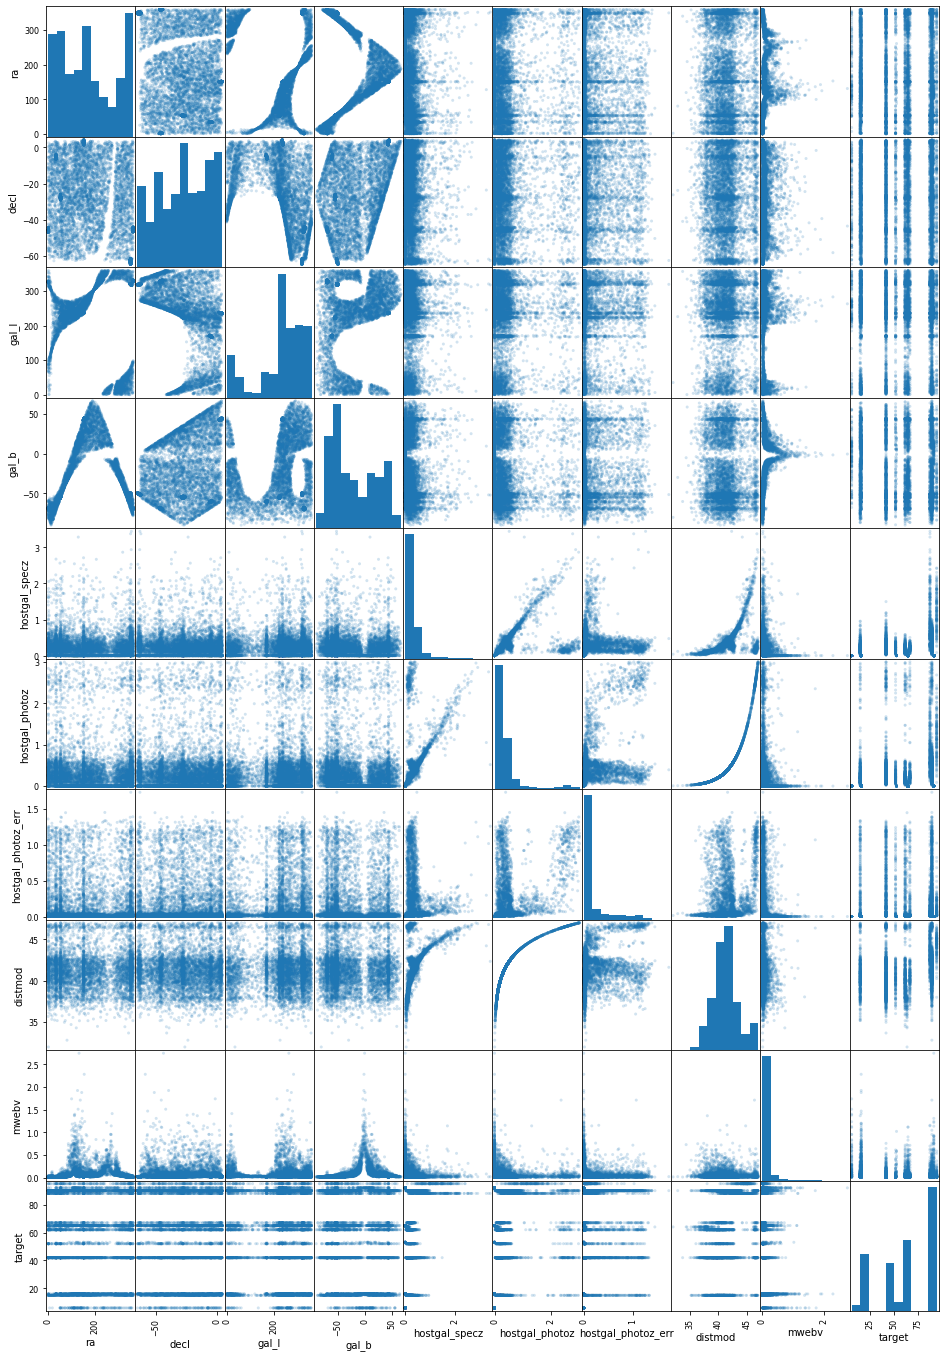

In [ ]:
pd.plotting.scatter_matrix(metadata2, alpha=.2, figsize=(16,24));

#**Figure Two:**

*The two plots directly above are associated with the caption. In the first plot, a simple distribution of the data for each category of the metadata is shown. The ra and decl categories appear to have relatively uniform distributions where as most of the rest of the data is some form of skewed bell curve. Notably, we can choose to ignore the objects_id and ddf categories because they are not associated with physical measurements.*

*The second plot shows the scatter matrix of all the data once the objects_id and ddf categories have been tossed. Many of the plots here have a clear structure to them (i.e. gal_b vs ra). Since we are interested in data extraction we should determine what the 'best' features are that meet this criteria. From the plots, gal_l, gal_b, ra, and decl all have covariance with one another, otherwise they would be evenly distibuted. A similar argument could be made for hostgal_specz, hostgal_photoz, distmod, and mwebv.*

# TASK III: Extract features - 5 points

### Feature extraction refers to the extraction of statistical features of the datapoints or the generation of low dimensional representations of the data points that can then be passed to a classifier/regression

### * **Minimum Deliverable** Extract at least 4 featues if you are taking PHYS461 and at least 6 if you are taking PHYS661 features including at least 1 feature from all three category below

The code that won the callenge did a number of smart things, of course (it was a feature based classification scheme, which included Gaussian Processes in the preprocessing for interpolation). The feature extraction part of the code is here. https://github.com/kboone/avocado/blob/master/avocado/plasticc.py

Examples of features you can extract:

- **from the original lightcurve**: 
    - mean, 
    - standard deviation, 
    - skewness, 
    - kurthosis, 
    - minimum 
    - maximmum,
    - error on the minimum and 
    - error on the maximum, 
- **from the standardized lightcurve**:
    - median 
    - slope of a line fit
    - intercept of a line fit
    - likelihood of the line fit
    - likelihood of a quadratic fit
    - sign of the quadratic parameter

- **from the metadata file**:
    - decl; this is one of the positions in the sky variables: important because the position on the sky may determin if it is a galactic or extragalactic object
    - ddf_bool ; the kind of survey i.e. the data collection scheme that lead to the time series
    - hostgal_photoz
    - hostgal_photoz_err
    
The feature in the metadata files are the hardest ones to decide on because they require domain knowledge.
Most of the other features in the metadata are unknown for test objects (only known for the training set)


Extract N features including 1 features from all three category above: original lcv, standardized lcv, metadata. Justify each feature. Coming up with different features than the ones I suggested is very welcome! Remember that if the features are extracted from the time series there will be 6 features for each choice feature (one for each of the 6 passbands) so I ended up with 94 features with the scheme outlined above.

Note: we are working with bigg-ish data! 
First off: every new piece should be developed on a subset of the dataset, then run on all the data only when ready. 
Still, if you try achieve goals by implementing for loops you are not going to be able to run the notebook for the whole data, or even only 1 batch of the full datase. A good solution is to use the groupby() method in pandas. I used groupby everywhere. Also it may be wise to write out intermediate outputs, so you do not have to loose work if your kernel dies or something similar. 

### TASK III.1 describe each feature you plan to extract. 
Briefly indicate why you think it is a valuable feature and what data type is it (e.g. continuous, binary, categorical, if continuous does it have a max or min value or is it unbound?)

        

#**ANSWER**

*From the original lightcurve I will extract the mean and the standard deviation. I chose these two features because the objects I sampeled earlier had similar values (between 0-200) across different objects for each filter - generally speaking - indicating that these features will be a good way to extract unique events as well as to distinguish between filters if necessary. Both of these features are continuous data types with a minimum of 0 and I think the maximum is unbounded since it is a measurement of flux.*

*From the standarsized lightcurve I will extract the slope and intercept of the line fit. I chose these continous data types after evalutaing several different features from the normalized light curves. By inspection it appeared that the curves were mostly linear and so I figured that the slope and intercept would be good features to extract as a result.*

*From the metadata I will extract the declination, hostgal specz, and dff. I chose the first two features after reading through the associated kaggle challenge data_note.pdf which revealed that a lot of the metadata features are related to one another (e.g. hostgal_specz and hostgal_photoz and distmod). So I chose the two - that from the best of my knowledge - encapsulated a lot of info from the other categories. Both of these features are continous where the declination is bounded between -180 and 180 degrees and tje hostgal_specz is bounded between 0 and infinity (although technically I believe there is a theoretical max due to how the speed of light relates to the accelerating expansion of the universe). The last feature is chosen because it will be the target for PART II.*

*Additionally, the ddf feature which is a binary data value will also be included in the feature set because it will be used as a target in PART II.*

### TASK III.2 extract some features from the raw lightcurve

In [ ]:
means = lcvs.groupby(["object_id", "passband"])[["flux"]].mean()
stds = lcvs.groupby(["object_id", "passband"])[["flux"]].std()

In [ ]:
features = means.rename({"flux": "mean"}, 
                        axis=1).merge(stds.rename({"flux": "std"}, 
                        axis=1), left_index=True, right_index=True)

In [ ]:
features

mean           std
object_id passband                           
615       0           -3.254554     83.944735
          1         -385.699911    601.787302
          2         -134.146566    455.121346
          3         -121.103501    335.425053
          4          -55.954592    291.803449
...                         ...           ...
130779836 1          725.169852   1197.557111
          2         2690.360415   6440.422386
          3          755.993902   1443.868085
          4         3489.185336  11006.766106
          5         4151.358875   8687.101173

[47088 rows x 2 columns]

### TASK III.3 Standardize the lcvs and extract some features from the raw lightcurve - 
I have some examples of how I did it in the next few lines of code

In [ ]:
lcvs["fluxnormed"] = 0.

In [ ]:
def normed(df):
  ''' This function normalizes the flux values of the inputed dataframe 
  (e.g. lcvs) by subtracting the mean and dividing by the standard deviation
  of the flux object by object.

  Parameters:
  df -- pandas dataframe object
  '''
  obj, band = df.object_id.values[0], df.passband.values[0]
  df["fluxnormed"] = (df["flux"] - means.loc[obj, band].values[0]) / stds.loc[obj, band].values[0]
  return df
 
lcvs = lcvs.groupby(["object_id", "passband"]).apply(normed)

# IF YOU GET STUCK ON THIS LOOK AT MY SOLUTION HERE https://gist.github.com/fedhere/b504759cb4513e1cfcf3727760c50589

In [ ]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,fluxnormed
0,615,59750.4229,2,-544.810303,3.622952,1,-0.902317
1,615,59750.4306,1,-816.434326,5.553370,1,-0.715759
2,615,59750.4383,3,-471.385529,3.801213,1,-1.044293
3,615,59750.4450,4,-388.984985,11.395031,1,-1.141283
4,615,59752.4070,2,-681.858887,4.041204,1,-1.203442


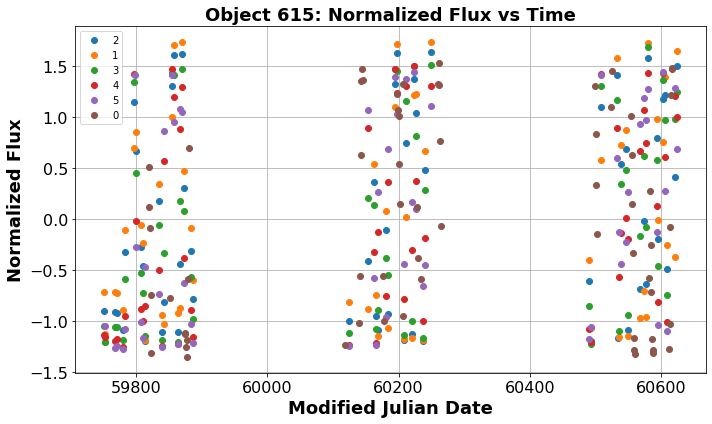

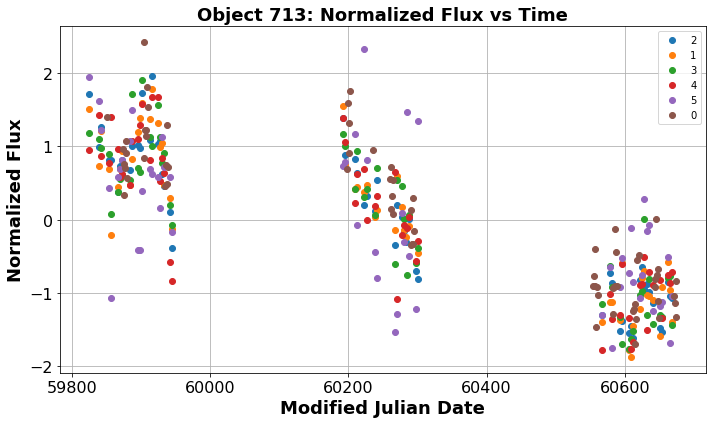

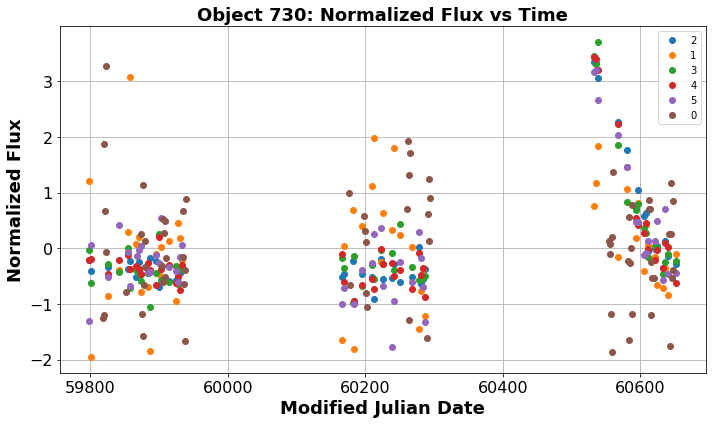

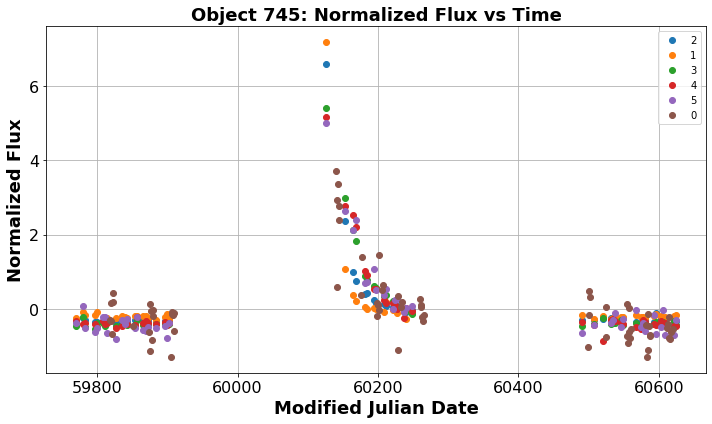

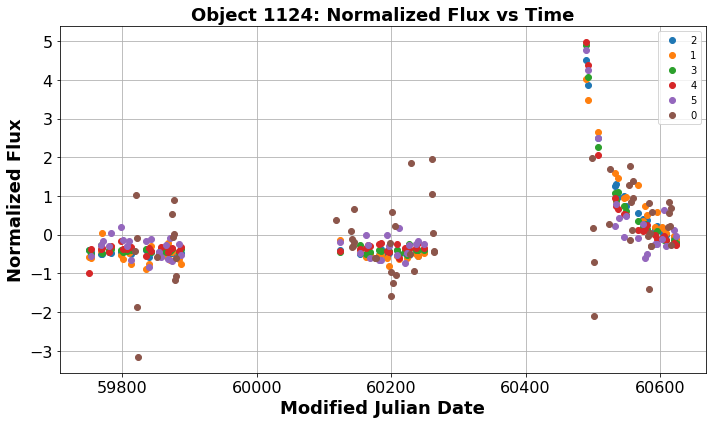

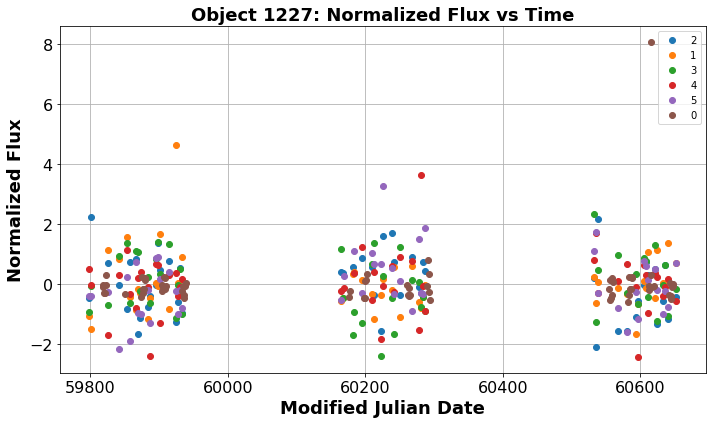

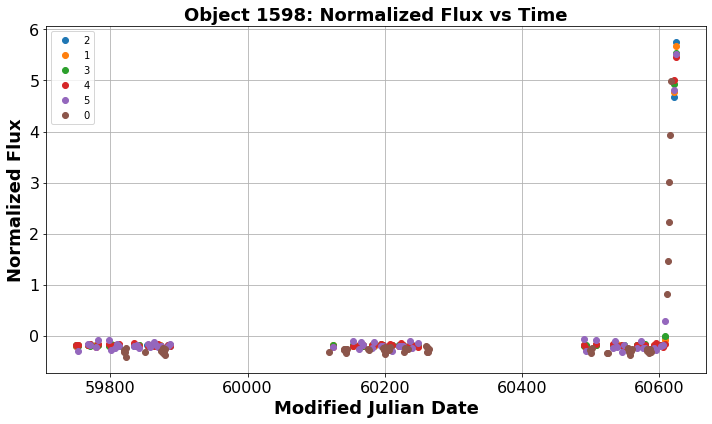

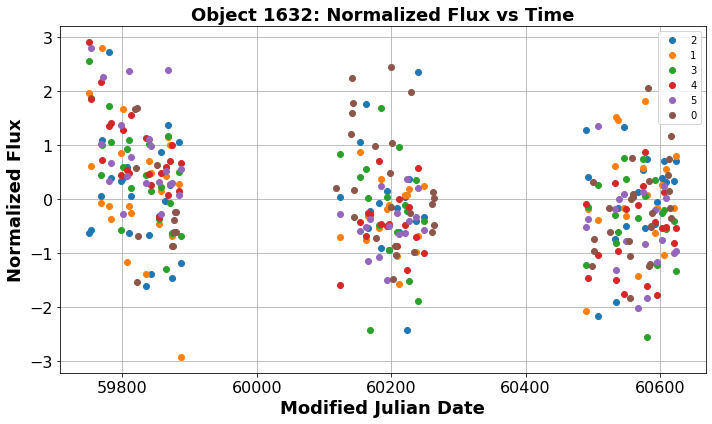

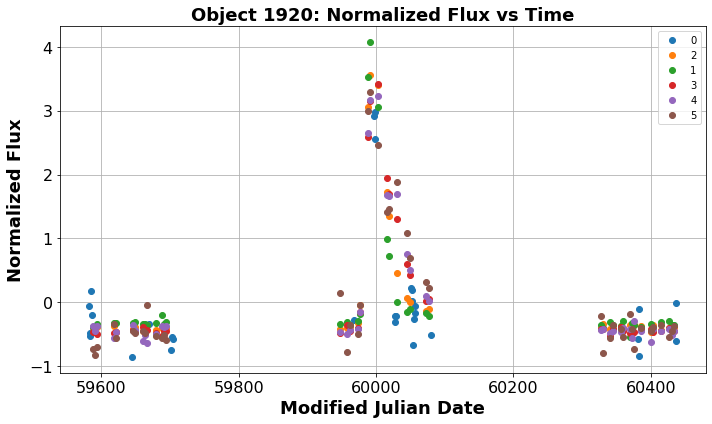

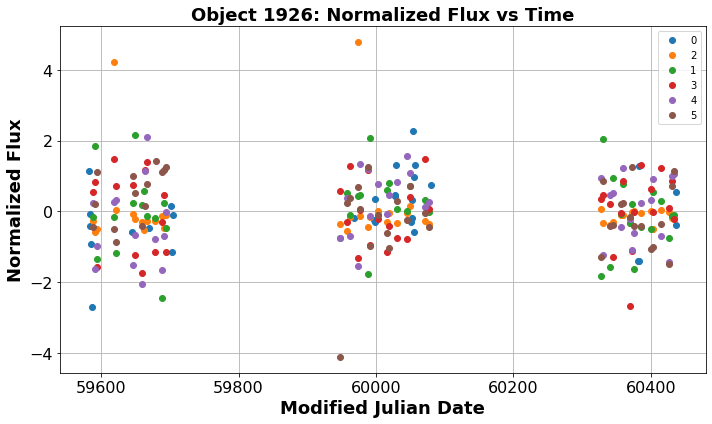

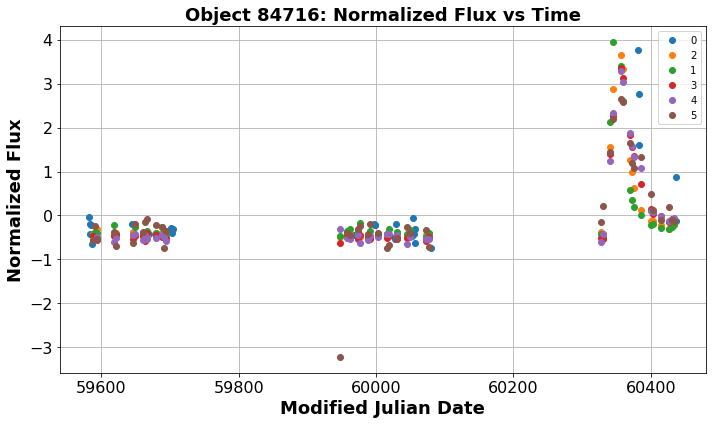

In [ ]:
# replot the normalized time series to make sure I did it right
for x in objects_to_plot:
  plt.figure(figsize=(10,6))
  data = (lcvs[lcvs['object_id'] == x])
  for y in data["passband"].unique():
    data2 = (data[data["passband"] == y])
    flux = data2['fluxnormed']
    date = data2["mjd"]
    plt.errorbar(date, flux, fmt="o", label=y)
  plt.title("Object "+str(x)+": Normalized Flux vs Time", fontsize=18, fontweight='bold')
  plt.xlabel("Modified Julian Date", fontsize=18, fontweight='bold')
  plt.ylabel("Normalized Flux", fontsize=18, fontweight='bold')
  plt.legend()
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

#**Figure Three:**

*Above we can see the normalized fluxes for the first ten objects and 84716. These plots were made the exact same way as in Figure One. The normalization appears to have worked because the plots have the same structure. Furthermore, because of the normalization we can actually see differences between the filters much better now.*


extract some features that come from simple models of the lightcurve



a line fit to the standardized data and store the slope and intercept as new features. See here for how to apply this with a groupby https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
If you can use groupby you get an extra point (cause that would be a very efficient way to do it)

In [ ]:
'''
Credit: https://gist.github.com/karpanGit/5ed258d1c0e866d824d64c76cbd618fa
Credit: https://stackoverflow.com/questions/37084446/pandas-groupby-linregress-how-to-extract
'''

def extract_lr(x,y):
  ''' Finds the linear regression parameters from the arrays x and y
  Parameters:
  x -- the independent values
  y -- the dependent values
  '''
  lr = linregress(x, y)
  return pd.Series({'slope':lr.slope, 'intercept':lr.intercept})

linfits = lcvs.groupby(["object_id", "passband"]).apply(lambda x:
                                                        extract_lr(x['mjd'],
                                                        x['fluxnormed']))

In [ ]:
linfits

slope   intercept
object_id passband                      
615       0         0.000524  -31.568270
          1         0.000559  -33.627702
          2         0.000750  -45.105485
          3         0.000908  -54.614313
          4         0.001037  -62.397784
...                      ...         ...
130779836 1        -0.002528  152.092978
          2        -0.001860  111.924143
          3        -0.002308  138.977576
          4        -0.001134   68.241195
          5        -0.001480   89.045190

[47088 rows x 2 columns]

In [ ]:
features = features.merge(linfits, left_index=True, right_index=True)
print("From your sampled syntax a few cells above, I merged my slopes and \n"+
      "intercepts into the features data frame.")
features

From your sampled syntax a few cells above, I merged my slopes and 
intercepts into the features data frame.


mean           std     slope   intercept
object_id passband                                                 
615       0           -3.254554     83.944735  0.000524  -31.568270
          1         -385.699911    601.787302  0.000559  -33.627702
          2         -134.146566    455.121346  0.000750  -45.105485
          3         -121.103501    335.425053  0.000908  -54.614313
          4          -55.954592    291.803449  0.001037  -62.397784
...                         ...           ...       ...         ...
130779836 1          725.169852   1197.557111 -0.002528  152.092978
          2         2690.360415   6440.422386 -0.001860  111.924143
          3          755.993902   1443.868085 -0.002308  138.977576
          4         3489.185336  11006.766106 -0.001134   68.241195
          5         4151.358875   8687.101173 -0.001480   89.045190

[47088 rows x 4 columns]

## TASK III.4: features from metadata

when you do this think about what you need to perform the classification. before you decide briefly look at the tasks you have to peform in part 2

In [ ]:
print("After looking at PART II, I know I need to include ddf in my \n" +
      "feature space in addition to the other features I chose to extract \n"+
      "from the metadata. \n")
print("My features in the metadata are already set up correctly for the \n"+
      "next part so I can move onto Task III.5")

After looking at PART II, I know I need to include ddf in my 
feature space in addition to the other features I chose to extract 
from the metadata. 

My features in the metadata are already set up correctly for the 
next part so I can move onto Task III.5


## Task III.5: assemble and show your feature space


### Manipulate your dataframe until it has N objects on the N rows and M features on the columnms. Note that this may take a few steps. _The partial code below is given to you as an example but you do not have to follow it_

<font color='red'>I strongly recommand you save these features in a csv file with allfeatures.to_csv(...) so that if your code crushes when you work on part two you can simply reread the feature file without rerunning the code!</font>

This was my dataframe after feature extraction. Yours will look different but it should be structured the same way: object + bandpass makes a row, features are the columns

NOTE: this took several steps. The codes and output below convey some of those steps. You do not have to use this code, it is here to help you if you need it

In the way I cereated the feature dataframe I have a feature column for each object and bandpass. I need to manipulate the dataframe so that I have 6xN features per object where N is the number of features I engineered. 


In [ ]:
# unstack will do the trick ... !!!make sure you save a copy of your features before maniulating them!!! in vase something goes wrong.
features = features.reset_index().set_index(['object_id','passband']).stack(
    ).unstack([1,2])

In [ ]:
print("Now I have a 4*N feature space. I need to include the metadata" +
      "features now")
features

Now I have a 4*N feature space. I need to include the metadatafeatures now


passband            0                         ...            5                      
                 mean          std     slope  ...          std     slope   intercept
object_id                                     ...                                   
615         -3.254554    83.944735  0.000524  ...   294.779522  0.001003  -60.370675
713         -2.720398     7.113509 -0.002859  ...     7.094073 -0.001978  119.182082
730         -0.048080     1.828872 -0.000121  ...    13.332758  0.001259  -75.802184
745          1.797523     4.374445 -0.000700  ...    26.060130  0.000003   -0.159352
1124         0.660948     2.360084  0.001234  ...    21.434627  0.001110  -66.832942
...               ...          ...       ...  ...          ...       ...         ...
130739978    1.286655    15.998517  0.000190  ...    97.602719 -0.000778   46.872532
130755807   24.635243    79.713932 -0.000703  ...    38.849765 -0.000086    5.163902
130762946   -0.282914    46.605187 -0.000793  ...    48.309960 -0.000044    2.651267
130772921    3.374208    14.420201  0.000592  ...    44.169662 -0.000604   36.289533
130779836  812.700937  2120.766511 -0.001743  ...  8687.101173 -0.001480   89.045190

[7848 rows x 24 columns]

In [ ]:
print(features.columns.get_level_values(0))
print(features.columns.get_level_values(1))
print(features.columns)

Int64Index([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
            5, 5],
           dtype='int64', name='passband')
Index(['mean', 'std', 'slope', 'intercept', 'mean', 'std', 'slope',
       'intercept', 'mean', 'std', 'slope', 'intercept', 'mean', 'std',
       'slope', 'intercept', 'mean', 'std', 'slope', 'intercept', 'mean',
       'std', 'slope', 'intercept'],
      dtype='object')
MultiIndex([(0,      'mean'),
            (0,       'std'),
            (0,     'slope'),
            (0, 'intercept'),
            (1,      'mean'),
            (1,       'std'),
            (1,     'slope'),
            (1, 'intercept'),
            (2,      'mean'),
            (2,       'std'),
            (2,     'slope'),
            (2, 'intercept'),
            (3,      'mean'),
            (3,       'std'),
            (3,     'slope'),
            (3, 'intercept'),
            (4,      'mean'),
            (4,       'std'),
            (4,     'slope'),
            (4, '

In [ ]:
features.columns = [str(col[0])+', '+col[1] for col in features.columns]

In [ ]:
features

,"0, mean","0, std","0, slope","0, intercept","1, mean","1, std","1, slope","1, intercept","2, mean","2, std","2, slope","2, intercept","3, mean","3, std","3, slope","3, intercept","4, mean","4, std","4, slope","4, intercept","5, mean","5, std","5, slope","5, intercept"
object_id,,,,,,,,,,,,,,,,,,,,,,,,
615,-3.254554,83.944735,0.000524,-31.568270,-385.699911,601.787302,0.000559,-33.627702,-134.146566,455.121346,0.000750,-45.105485,-121.103501,335.425053,0.000908,-54.614313,-55.954592,291.803449,0.001037,-62.397784,-47.449847,294.779522,0.001003,-60.370675
713,-2.720398,7.113509,-0.002859,172.455472,-1.019804,5.712334,-0.002799,168.612245,-0.794238,5.770738,-0.002836,170.826454,-0.986966,6.450413,-0.002748,165.544360,-0.900262,6.406989,-0.002681,161.531278,-1.794175,7.094073,-0.001978,119.182082
730,-0.048080,1.828872,-0.000121,7.289630,0.141057,1.807229,0.000337,-20.314607,2.400870,5.559483,0.001724,-103.782909,3.236164,8.191987,0.001578,-95.022386,4.308728,10.710344,0.001477,-88.965827,4.539396,13.332758,0.001259,-75.802184
745,1.797523,4.374445,-0.000700,42.151725,5.717394,25.964659,-0.000092,5.545342,9.711532,31.957997,-0.000081,4.878532,14.412924,34.967698,-0.000062,3.756656,13.134436,33.069053,-0.000108,6.494881,10.746138,26.060130,0.000003,-0.159352
1124,0.660948,2.360084,0.001234,-74.410211,4.634637,8.107525,0.001865,-112.221525,10.243968,21.319854,0.001677,-100.906766,11.086555,26.270649,0.001452,-87.393508,9.906102,26.865913,0.001344,-80.863243,6.896742,21.434627,0.001110,-66.832942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130739978,1.286655,15.998517,0.000190,-11.448937,11.604012,42.103636,0.000989,-59.510004,1.487066,9.781002,0.000124,-7.473823,4.696556,9.132244,0.000982,-59.140050,-1.326906,16.735430,-0.000533,32.091696,20.073462,97.602719,-0.000778,46.872532
130755807,24.635243,79.713932,-0.000703,42.373358,6.965825,16.268582,-0.000303,18.233770,-0.779640,4.606559,0.000950,-57.189119,27.147503,88.177979,0.000097,-5.810521,40.758273,108.319727,-0.000090,5.424259,3.528390,38.849765,-0.000086,5.163902
130762946,-0.282914,46.605187,-0.000793,47.728505,-20.094296,23.572412,0.002195,-132.214184,-28.388796,29.855715,-0.000106,6.385096,-13.723449,31.491707,-0.002267,136.380349,-15.201844,22.364118,0.000400,-24.002974,-9.838345,48.309960,-0.000044,2.651267


In [ ]:
features = features.reset_index()
features

,object_id,"0, mean","0, std","0, slope","0, intercept","1, mean","1, std","1, slope","1, intercept","2, mean","2, std","2, slope","2, intercept","3, mean","3, std","3, slope","3, intercept","4, mean","4, std","4, slope","4, intercept","5, mean","5, std","5, slope","5, intercept"
0,615,-3.254554,83.944735,0.000524,-31.568270,-385.699911,601.787302,0.000559,-33.627702,-134.146566,455.121346,0.000750,-45.105485,-121.103501,335.425053,0.000908,-54.614313,-55.954592,291.803449,0.001037,-62.397784,-47.449847,294.779522,0.001003,-60.370675
1,713,-2.720398,7.113509,-0.002859,172.455472,-1.019804,5.712334,-0.002799,168.612245,-0.794238,5.770738,-0.002836,170.826454,-0.986966,6.450413,-0.002748,165.544360,-0.900262,6.406989,-0.002681,161.531278,-1.794175,7.094073,-0.001978,119.182082
2,730,-0.048080,1.828872,-0.000121,7.289630,0.141057,1.807229,0.000337,-20.314607,2.400870,5.559483,0.001724,-103.782909,3.236164,8.191987,0.001578,-95.022386,4.308728,10.710344,0.001477,-88.965827,4.539396,13.332758,0.001259,-75.802184
3,745,1.797523,4.374445,-0.000700,42.151725,5.717394,25.964659,-0.000092,5.545342,9.711532,31.957997,-0.000081,4.878532,14.412924,34.967698,-0.000062,3.756656,13.134436,33.069053,-0.000108,6.494881,10.746138,26.060130,0.000003,-0.159352
4,1124,0.660948,2.360084,0.001234,-74.410211,4.634637,8.107525,0.001865,-112.221525,10.243968,21.319854,0.001677,-100.906766,11.086555,26.270649,0.001452,-87.393508,9.906102,26.865913,0.001344,-80.863243,6.896742,21.434627,0.001110,-66.832942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,1.286655,15.998517,0.000190,-11.448937,11.604012,42.103636,0.000989,-59.510004,1.487066,9.781002,0.000124,-7.473823,4.696556,9.132244,0.000982,-59.140050,-1.326906,16.735430,-0.000533,32.091696,20.073462,97.602719,-0.000778,46.872532
7844,130755807,24.635243,79.713932,-0.000703,42.373358,6.965825,16.268582,-0.000303,18.233770,-0.779640,4.606559,0.000950,-57.189119,27.147503,88.177979,0.000097,-5.810521,40.758273,108.319727,-0.000090,5.424259,3.528390,38.849765,-0.000086,5.163902
7845,130762946,-0.282914,46.605187,-0.000793,47.728505,-20.094296,23.572412,0.002195,-132.214184,-28.388796,29.855715,-0.000106,6.385096,-13.723449,31.491707,-0.002267,136.380349,-15.201844,22.364118,0.000400,-24.002974,-9.838345,48.309960,-0.000044,2.651267
7846,130772921,3.374208,14.420201,0.000592,-35.633100,28.342250,97.513710,0.001012,-60.983162,0.618994,6.550608,0.000680,-40.982186,-0.357920,7.667434,-0.000094,5.647012,-1.135067,10.112169,-0.000237,14.228242,7.671389,44.169662,-0.000604,36.289533


In [ ]:
metadata

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0000,0.0000,0.0000,NaN,0.013,65
7844,130755807,120.101349,-62.696659,275.742955,-16.509746,0,0.1725,2.5606,1.1146,46.6108,0.136,90
7845,130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0000,0.0000,0.0000,NaN,0.430,16
7846,130772921,79.101562,-35.501846,239.172243,-33.827844,0,0.0000,0.0000,0.0000,NaN,0.034,65


In [ ]:
allfeatures = features.copy()
allfeatures = allfeatures.join(metadata["ddf"])
allfeatures = allfeatures.join(metadata["target"])
allfeatures = allfeatures.join(metadata["decl"])
allfeatures = allfeatures.join(metadata["hostgal_specz"])
allfeatures = allfeatures.drop(["object_id"], axis=1)

In [ ]:
print("The cell above merge the ddf, decl, target, and hostgal_specz \n"+
      "columns from the metadata dataframe to the all features dataframe.")
allfeatures

The cell above merge the ddf, decl, target, and hostgal_specz 
columns from the metadata dataframe to the all features dataframe.


,"0, mean","0, std","0, slope","0, intercept","1, mean","1, std","1, slope","1, intercept","2, mean","2, std","2, slope","2, intercept","3, mean","3, std","3, slope","3, intercept","4, mean","4, std","4, slope","4, intercept","5, mean","5, std","5, slope","5, intercept",ddf,target,decl,hostgal_specz
0,-3.254554,83.944735,0.000524,-31.568270,-385.699911,601.787302,0.000559,-33.627702,-134.146566,455.121346,0.000750,-45.105485,-121.103501,335.425053,0.000908,-54.614313,-55.954592,291.803449,0.001037,-62.397784,-47.449847,294.779522,0.001003,-60.370675,1,92,-61.943836,0.0000
1,-2.720398,7.113509,-0.002859,172.455472,-1.019804,5.712334,-0.002799,168.612245,-0.794238,5.770738,-0.002836,170.826454,-0.986966,6.450413,-0.002748,165.544360,-0.900262,6.406989,-0.002681,161.531278,-1.794175,7.094073,-0.001978,119.182082,1,88,-27.784405,1.8181
2,-0.048080,1.828872,-0.000121,7.289630,0.141057,1.807229,0.000337,-20.314607,2.400870,5.559483,0.001724,-103.782909,3.236164,8.191987,0.001578,-95.022386,4.308728,10.710344,0.001477,-88.965827,4.539396,13.332758,0.001259,-75.802184,1,42,-6.579593,0.2320
3,1.797523,4.374445,-0.000700,42.151725,5.717394,25.964659,-0.000092,5.545342,9.711532,31.957997,-0.000081,4.878532,14.412924,34.967698,-0.000062,3.756656,13.134436,33.069053,-0.000108,6.494881,10.746138,26.060130,0.000003,-0.159352,1,90,-45.586655,0.3037
4,0.660948,2.360084,0.001234,-74.410211,4.634637,8.107525,0.001865,-112.221525,10.243968,21.319854,0.001677,-100.906766,11.086555,26.270649,0.001452,-87.393508,9.906102,26.865913,0.001344,-80.863243,6.896742,21.434627,0.001110,-66.832942,1,90,-63.823658,0.1934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,1.286655,15.998517,0.000190,-11.448937,11.604012,42.103636,0.000989,-59.510004,1.487066,9.781002,0.000124,-7.473823,4.696556,9.132244,0.000982,-59.140050,-1.326906,16.735430,-0.000533,32.091696,20.073462,97.602719,-0.000778,46.872532,0,65,-14.940303,0.0000
7844,24.635243,79.713932,-0.000703,42.373358,6.965825,16.268582,-0.000303,18.233770,-0.779640,4.606559,0.000950,-57.189119,27.147503,88.177979,0.000097,-5.810521,40.758273,108.319727,-0.000090,5.424259,3.528390,38.849765,-0.000086,5.163902,0,90,-62.696659,0.1725
7845,-0.282914,46.605187,-0.000793,47.728505,-20.094296,23.572412,0.002195,-132.214184,-28.388796,29.855715,-0.000106,6.385096,-13.723449,31.491707,-0.002267,136.380349,-15.201844,22.364118,0.000400,-24.002974,-9.838345,48.309960,-0.000044,2.651267,0,16,-55.682144,0.0000
7846,3.374208,14.420201,0.000592,-35.633100,28.342250,97.513710,0.001012,-60.983162,0.618994,6.550608,0.000680,-40.982186,-0.357920,7.667434,-0.000094,5.647012,-1.135067,10.112169,-0.000237,14.228242,7.671389,44.169662,-0.000604,36.289533,0,65,-35.501846,0.0000


* Deliverable: what is the shape of your final feature space?

In [ ]:
print("My feature space is {} features (rows, columns)".format(
    allfeatures.shape))

My feature space is (7848, 28) features (rows, columns)


# Task IV: Create your train and test set out of the feature matrix and preprocess them appropriately (remember that based on the model you choose you may need to scale, normalize, standardize, or whiten your data) - 2 points

the kaggle challenges provide training and test data, but here create your own training/test from the data that you read in (the training set from kaggle)

make sure you deal with missing data

split train-test set

In [ ]:
print("I dealt with the missing data by ensuring that the features I used \n"+
      "didn't have any missing data. I did this by inspecting the lcvs and\n"+
      "metadata files as well as using the describe function at the very \n"+
      "beginning to determine what the data looked like. For example, \n"+
      "the distmod category in the metadata has a lot of missing entries so \n"+
      "I chose to avoid it.")

I dealt with the missing data by ensuring that the features I used 
didn't have any missing data. I did this by inspecting the lcvs and
metadata files as well as using the describe function at the very 
beginning to determine what the data looked like. For example, 
the distmod category in the metadata has a lot of missing entries so 
I chose to avoid it.


In [ ]:
target1 = allfeatures["ddf"]
target2 = allfeatures["target"]
allfeatures = allfeatures.drop(columns=["ddf","target"])
print("The above lines perform two tasks: first, it makes a list of the \n"+
      "targets (ddfs) and second, it removes the ddfs from the feature \n"+
      "space. If we don't do this then the classifiers will know eaxactly \n"+
      "what each objects' ddf value is because it is already associated \n"+
      "with it in the feature space. In other words, the feature space \n"+
      "would already include the data we are interested in solving.")

The above lines perform two tasks: first, it makes a list of the 
targets (ddfs) and second, it removes the ddfs from the feature 
space. If we don't do this then the classifiers will know eaxactly 
what each objects' ddf value is because it is already associated 
with it in the feature space. In other words, the feature space 
would already include the data we are interested in solving.


In [ ]:
allfeatures

,"0, mean","0, std","0, slope","0, intercept","1, mean","1, std","1, slope","1, intercept","2, mean","2, std","2, slope","2, intercept","3, mean","3, std","3, slope","3, intercept","4, mean","4, std","4, slope","4, intercept","5, mean","5, std","5, slope","5, intercept",decl,hostgal_specz
0,-3.254554,83.944735,0.000524,-31.568270,-385.699911,601.787302,0.000559,-33.627702,-134.146566,455.121346,0.000750,-45.105485,-121.103501,335.425053,0.000908,-54.614313,-55.954592,291.803449,0.001037,-62.397784,-47.449847,294.779522,0.001003,-60.370675,-61.943836,0.0000
1,-2.720398,7.113509,-0.002859,172.455472,-1.019804,5.712334,-0.002799,168.612245,-0.794238,5.770738,-0.002836,170.826454,-0.986966,6.450413,-0.002748,165.544360,-0.900262,6.406989,-0.002681,161.531278,-1.794175,7.094073,-0.001978,119.182082,-27.784405,1.8181
2,-0.048080,1.828872,-0.000121,7.289630,0.141057,1.807229,0.000337,-20.314607,2.400870,5.559483,0.001724,-103.782909,3.236164,8.191987,0.001578,-95.022386,4.308728,10.710344,0.001477,-88.965827,4.539396,13.332758,0.001259,-75.802184,-6.579593,0.2320
3,1.797523,4.374445,-0.000700,42.151725,5.717394,25.964659,-0.000092,5.545342,9.711532,31.957997,-0.000081,4.878532,14.412924,34.967698,-0.000062,3.756656,13.134436,33.069053,-0.000108,6.494881,10.746138,26.060130,0.000003,-0.159352,-45.586655,0.3037
4,0.660948,2.360084,0.001234,-74.410211,4.634637,8.107525,0.001865,-112.221525,10.243968,21.319854,0.001677,-100.906766,11.086555,26.270649,0.001452,-87.393508,9.906102,26.865913,0.001344,-80.863243,6.896742,21.434627,0.001110,-66.832942,-63.823658,0.1934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,1.286655,15.998517,0.000190,-11.448937,11.604012,42.103636,0.000989,-59.510004,1.487066,9.781002,0.000124,-7.473823,4.696556,9.132244,0.000982,-59.140050,-1.326906,16.735430,-0.000533,32.091696,20.073462,97.602719,-0.000778,46.872532,-14.940303,0.0000
7844,24.635243,79.713932,-0.000703,42.373358,6.965825,16.268582,-0.000303,18.233770,-0.779640,4.606559,0.000950,-57.189119,27.147503,88.177979,0.000097,-5.810521,40.758273,108.319727,-0.000090,5.424259,3.528390,38.849765,-0.000086,5.163902,-62.696659,0.1725
7845,-0.282914,46.605187,-0.000793,47.728505,-20.094296,23.572412,0.002195,-132.214184,-28.388796,29.855715,-0.000106,6.385096,-13.723449,31.491707,-0.002267,136.380349,-15.201844,22.364118,0.000400,-24.002974,-9.838345,48.309960,-0.000044,2.651267,-55.682144,0.0000
7846,3.374208,14.420201,0.000592,-35.633100,28.342250,97.513710,0.001012,-60.983162,0.618994,6.550608,0.000680,-40.982186,-0.357920,7.667434,-0.000094,5.647012,-1.135067,10.112169,-0.000237,14.228242,7.671389,44.169662,-0.000604,36.289533,-35.501846,0.0000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allfeatures, target1, test_size=0.4, random_state=1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(allfeatures, target2, test_size=0.4, random_state=1)

#  PART II: Classifying:







# TASK V Easy classification task: 


### TASK V.I Build a model and fit it to the data

use as target variable **ddf_bool** - this is the kind of survey, i.e. the kind of observing strategy that is implemented. DDF stands for Deep Drilling Field and the observations are much more dense in time. This classification should be achievable.


In [ ]:
gbt = GradientBoostingClassifier(random_state=69420, max_depth=3)
print('Parameters currently in use (GBT):\n')
pprint(gbt.get_params())

Parameters currently in use (GBT):

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 69420,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=69420)


### TASK V.II Deliverable I:
measure model accuracy and comment : what does the number I obtained mean?

In [ ]:
gbt.score(X_train, y_train), gbt.score(X_test, y_test)

(0.9855564995751912, 0.9640127388535031)

#**ANSWER**

*The gradient forest classifier scores can be found above. The left score indicates the percent of correctly identified ddf values within the training set and the right score indicates the percent of correctly identified ddf values within the test set. Both values are clearly quite accurate \~98% and \~96% which is excellent. Furthermore, because the difference between the values is very close (\~4%) we know that overtraining is not occurring (the threshold of which is 10%).* 


### TASK V.III Deliverable II: visualize the model result
Either ROC or Classification matrix (check the higgs boson notebook https://github.com/fedhere/DSPS_FBianco/tree/master/HW8)



In [ ]:
def plot_confusion_matrix(y_true, y_pred, normalize=True,title='',
                          cmap=plt.cm.bone):
  """This function prints and plots the confusion matrix. Normalization can 
  be applied by setting `normalize=True`.

  Parameters:
  y_true  --  a list of what the correct values are
  y_pred  --  a list of what the predicted values are
  """         
  plt.figure(figsize=(10,8))
  title = title + ' Confusion matrix, without normalization'
  # Compute confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.imshow(cm, cmap=cmap)
  plt.text(0,0, "%d"%cm[0][0])
  plt.text(1,1, "%d"%cm[1][1])
  plt.text(0,1, "%d"%cm[1][0], color="w", ha="center")
  plt.text(1,0, "%d"%cm[0][1], color="w", ha="center")
  plt.xticks([0,1], labels=["N", "P"])
  plt.yticks([0,1], labels=["N", "P"])    
  plt.title(title)
  plt.colorbar()
  plt.show()

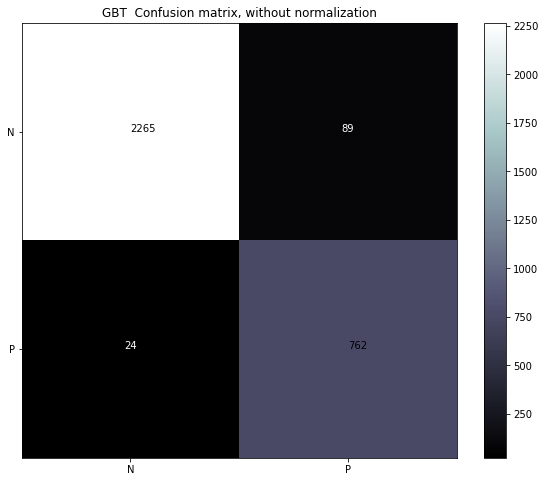

In [ ]:
plot_confusion_matrix(gbt.predict(X_test), y_test, title="GBT ")

#**Figure Four:**

*Above we can see the Classification or Confusion Matrix of the gradient forest classifier. The negative-negative and positive-positive categories are clearly the best which is as we desire. The rate of false-positives is especially low which is incredibly good. The rate of false-negatives is aslo quite low - although more numerous than the rate of false positives. Nevertheless, we can still see that there is a very good rate of correctness.*

## TASK VI Harder classification task - mandatory for 661 EC for 461:


### TASK VI.I Build a model and fit it to the data
Use an apprioriate classification method given your features dataset to classify objects predicting the "target" according to the **target** variable of the in the mtadata dataframe for both DDF and normal survey separately



In [ ]:
rf = RandomForestClassifier(random_state=69420, max_depth=8)
print('Parameters currently in use (RF):\n')
pprint(rf.get_params())

Parameters currently in use (RF):

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 69420,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=8, random_state=69420)


### TASK VI.II Deliverable I: 
measure model accuracy and comment : what does the number I obtained mean?

In [ ]:
rf.score(X_train1, y_train1), rf.score(X_test1, y_test1)

(0.7489379779099405, 0.6878980891719745)

#**ANSWER**

*The random forest classifier scores can be found above. The left score indicates the percent of correctly identified target values within the training set and the right score indicates the percent of correctly identified target values within the test set. Both values are 'very okay.' In other words, \~75% and \~69% are not great but they aren't terrible either. Furthermore, the difference between the values is approaching the overtraining threshold of 10% (currently it is \~8%). Unfortunately though, using a lesser depth (less than 8) yields poorer results, and using a greater depth (more than 8) yields overtraining. So it seems that these are the best results that the random forest classifier can yield.* 



### TASK VI.III Deliverable II: Visualize model result
Either ROC or Classification matrix 

In [ ]:
def plot_confusion_matrix1(y_true, y_pred, normalize=True,title='',
                          cmap=plt.cm.bone):
  """This function prints and plots the confusion matrix. Normalization can 
  be applied by setting `normalize=True`.

  Parameters:
  y_true  --  a list of what the correct values are
  y_pred  --  a list of what the predicted values are
  """         
  title = title + ' Confusion matrix, without normalization'
  # Compute confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(14,10))
  plt.imshow(cm, cmap=cmap)
  for i in list(range(14)):
    for j in list(range(14)):
      plt.text(i,j, "%d"%cm[i][j],color="r", ha="center")
  plt.xticks(list(range(14)), labels=metadata["target"].unique())
  plt.yticks(list(range(14)), labels=metadata["target"].unique())    
  plt.title(title)
  plt.colorbar()
  plt.show()

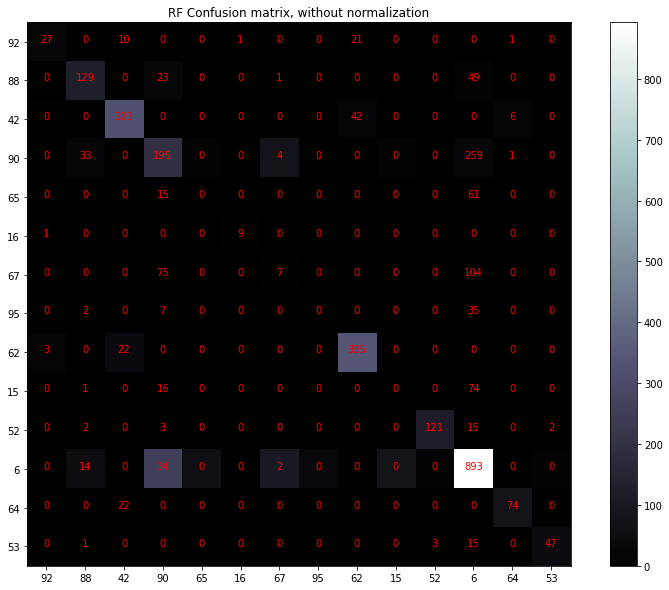

In [ ]:
plot_confusion_matrix1(rf.predict(X_test1), y_test1, title="RF")

#**Figure Five:**

*Above we can see the classification matrix for the random forest gradient where the target varibale in the metadata file is the target. The top left to bottom right diagonal is a measurement of the positive positves. All of the other entries are either false-positives or false-negatives. Notably, we can see that a majorities of the entries lie along the positive-positive axis which is as desired. In addition we can see that the 65-65, 95-95, and 15-15 entries all contain 0 positive-positive cases indicating that the random forest model does a very poor job of identifying these targets. This could just be because they are very few in number and thus hard to recognize because they are unique events.*


# EC: try to visualize the features. This is a high dimensional parameter space. you can for example try 2D t-SNE projection of your feature space and visualize it. 
If you are lucky, this will be a pretty plot!
a great model to **Visualize** structure in data is  t-SNE. Any other option you come up with is ok! You can choose to use the code below or to not to, there will be no penalty.

In [ ]:
allfeatures = allfeatures.join(metadata["ddf"])
allfeatures = allfeatures.join(metadata["target"])
print("Here I am reintroducing the targets from the classifiers back into \n"+
      "the allfeatures data set. Recall that I removed them because \n"+
      "the classifiers would know have 100% correction rates by virtue of \n"+
      "the target being in the data space")

Here I am reintroducing the targets from the classifiers back into 
the allfeatures data set. Recall that I removed them because 
the classifiers would know have 100% correction rates by virtue of 
the target being in the data space


In [ ]:
allfeatures_scaled = sk.preprocessing.scale(allfeatures, axis=0)

In [ ]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(allfeatures_scaled)
X_embedded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(7848, 2)

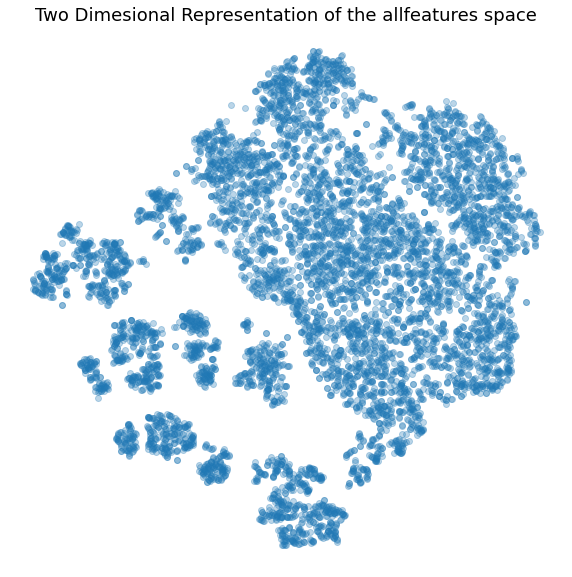

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha =.3)
plt.title("Two Dimesional Representation of the allfeatures space", fontsize=18)
plt.axis('off')
plt.show()

#**Figure Six**

*Above we have the two dimesional representation of the allfeatures data space. There is clearly structure exhibited in the plot which is a consequence of relationships between the different features. Interestingly, we can see the data splits off into specific blobs.*

We have to figure out if the clusters map to the target variable tho. So I will redo the plot colorcoded by target variable

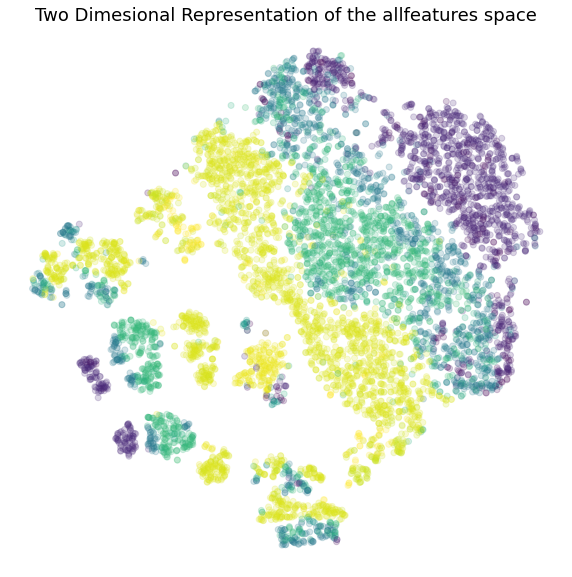

In [ ]:
norm_obj = Normalize(vmin=allfeatures["target"].min(), vmax=allfeatures["target"].max())
plt.figure(figsize=(10,10))
plt.title("Two Dimesional Representation of the allfeatures space", fontsize=18)
plt.axis('off')
plt.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in plt.cm.viridis(norm_obj(allfeatures["target"]))], alpha=0.2);


#**Figure Seven:**

*Above we have the same two dimensional representation of the data as we did in Figure Six, except now we have also distinguished between the different target types within the metadata file. Clearly, there are distinct areas within the plot that the different targets prefer (see the clusters of different colors). What I find somewhat surprising though, is how the different types of targets can have multiple preferred areas within the plot.*